# ME 581 HW 7
Yi Yang @ (yang1087@purdue.edu). All rights reserved.

## For problems 1 to 3
Approximate the solution of the following boundary value problems using the finite central difference method. Plot the approximate solution.

## Problem 1
$$u'' = -(x + 1)u' + 2u + (1 - x^2)e^{-x},\quad u(0) = -1,\;u(1) = 0$$

$\textbf{Solution:}$ The code to generate solutions is shown below,

[-1.         -0.98014919 -0.96059442 -0.94133176 -0.92235732 -0.90366729
 -0.88525788 -0.86712535 -0.84926602 -0.83167625 -0.81435244 -0.79729104
 -0.78048855 -0.76394149 -0.74764646 -0.73160007 -0.71579899 -0.70023992
 -0.68491962 -0.66983487 -0.6549825  -0.64035938 -0.62596243 -0.61178858
 -0.59783482 -0.58409818 -0.57057571 -0.55726452 -0.54416174 -0.53126454
 -0.51857012 -0.50607573 -0.49377864 -0.48167617 -0.46976565 -0.45804447
 -0.44651004 -0.4351598  -0.42399123 -0.41300184 -0.40218916 -0.39155077
 -0.38108428 -0.3707873  -0.36065751 -0.3506926  -0.34089029 -0.33124833
 -0.3217645  -0.31243661 -0.30326249 -0.29424001 -0.28536706 -0.27664156
 -0.26806144 -0.25962468 -0.25132928 -0.24317326 -0.23515467 -0.22727157
 -0.21952207 -0.2119043  -0.20441638 -0.1970565  -0.18982285 -0.18271364
 -0.17572712 -0.16886154 -0.1621152  -0.15548639 -0.14897345 -0.14257473
 -0.1362886  -0.13011345 -0.1240477  -0.11808978 -0.11223815 -0.10649127
 -0.10084765 -0.0953058  -0.08986425 -0.08452156 -0

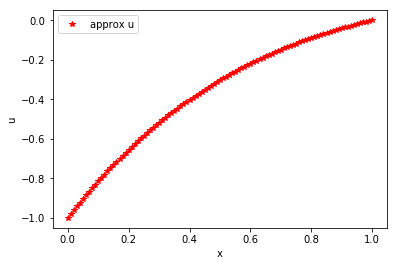

In [2]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
# approximate solutions in 101 points
a = 0.
b = 1.
N = 100
h = (b - a)/N
x = np.zeros(N+1)
u = np.zeros(N+1)
u[0] = -1.
for i in range(N+1):
    x[i] = a + i*h
aa = np.zeros(N-1)
aa[0:] = -2./h**2 - 2.
bb = np.zeros(N-2)
bb[0:] = 1./h**2 + (x[1:N-1] + 1.)/(2.*h)
cc = np.zeros(N-2)
cc[0:] = 1./h**2 - (x[2:N] + 1.)/(2.*h)
data = [aa.tolist(), bb.tolist(), cc.tolist()]
position = [0, 1, -1]
A = diags(data, position, (N-1,N-1),'csr')
y = np.zeros(N-1)
y[0] = (1. - x[1]**2)*np.exp(-x[1]) - (1./h**2 - (x[1] + 1.)/2./h)*u[0]
y[1:-1] = (1. - x[2:N-1]**2)*np.exp(-x[2:N-1])
y[-1] = (1. - x[N-1]**2)*np.exp(-x[N-1]) - (1./h**2 + (x[N-1] + 1.)/2./h)*u[N]
u[1:-1] = spsolve(A,y)
print(u)
plt.figure(1)
plt.plot(x,u,'r*',label='approx u')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

## Problem 2
$$u'' + 3u' = x^2 + \sin x,\quad u(-5) = 10,\;u(13.2) = 23$$

$\textbf{Solution:}$ Apply central finite difference scheme to ODE and we have,
$$(\frac{1}{h^2} - \frac{3}{2h})u_{i-1} - \frac{2}{h^2}u_i + (\frac{1}{h^2} + \frac{3}{2h})u_{i+1} = x_i^2 + \sin x_i$$
The code to genrate results is shown below,

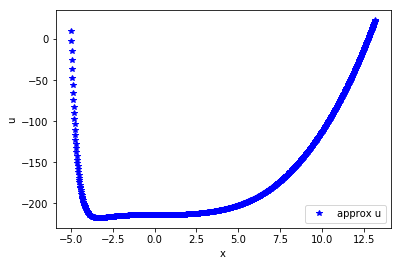

In [3]:
a2 = -5.
b2 = 13.2
N2 = 1000
h2 = (b2 - a2)/N2
x2 = np.zeros(N2+1)
u2 = np.zeros(N2+1)
u2[0] = 10.
u2[N2] = 23.
for i in range(N2+1):
    x2[i] = a2 + i*h2
aa2 = np.zeros(N2-1)
aa2[0:] = -2./h2**2
bb2 = np.zeros(N2-2)
bb2[0:] = 1./h2**2 + 3./(2.*h2)
cc2 = np.zeros(N2-2)
cc2[0:] = 1./h2**2 - 3./(2.*h2)
data2 = [aa2.tolist(), bb2.tolist(), cc2.tolist()]
position2 = [0, 1, -1]
A2 = diags(data2, position2, (N2-1,N2-1),'csr')
y2 = np.zeros(N2-1)
y2[0] = x2[1]**2 + np.sin(x2[1]) - (1./h2**2 - 3./2./h2)*u2[0]
y2[1:-1] = x2[2:N2-1]**2 + np.sin(x2[2:N2-1])
y2[-1] = x2[N2-1]**2 + np.sin(x2[N2-1]) - (1./h2**2 + 3./2./h2)*u2[N2]
u2[1:-1] = spsolve(A2,y2)
plt.figure(2)
plt.plot(x2,u2,'b*',label='approx u')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

## Problem 3
$$\frac{1}{\rho^2}\frac{d}{d\rho}(\rho^2\frac{du}{d\rho}) = -1,\quad u(1) = 0,\;u(2) = -\frac{1}{2}$$

$\textbf{Solution:}$ The ODE can be converted to 
$$\frac{d^2u}{d\rho^2} + \frac{2}{\rho}\frac{du}{d\rho} = -1$$
Apply central finite difference scheme to the ODE, we have
$$(\frac{1}{h^2} - \frac{2}{\rho_i}\frac{1}{2h})u_{i-1} - \frac{2}{h^2}u_i + (\frac{1}{h^2} + \frac{2}{\rho_i}\frac{1}{2h})u_{i+1} = -1$$
The code to generate the final result is shown below,

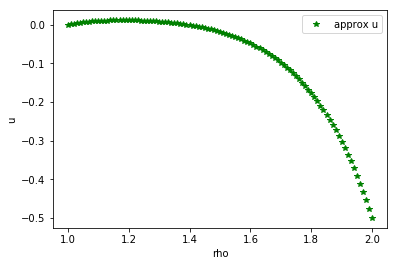

In [4]:
a3 = 1.
b3 = 2.
N3 = 100
h3 = (b3 - a3)/N3
x3 = np.zeros(N3+1)
u3 = np.zeros(N3+1)
u3[0] = 0.
u3[N3] = -0.5
for i in range(N3+1):
    x3[i] = a3 + i*h3
aa3 = np.zeros(N3-1)
aa3[0:] = -2./h3**2
bb3 = np.zeros(N3-2)
bb3[0:] = 1./h3**2 + 2./(2.*h3)/x3[1:N3-1]
cc3 = np.zeros(N3-2)
cc3[0:] = 1./h3**2 - 3./(2.*h3)/x3[2:N3]
data3 = [aa3.tolist(), bb3.tolist(), cc3.tolist()]
position3 = [0, 1, -1]
A3 = diags(data3, position3, (N3-1,N3-1),'csr')
y3 = np.zeros(N3-1)
y3[0] = -1. - (1./h3**2 - 2./2./h3/x3[1])*u3[0]
y3[1:-1] = -1.
y3[-1] = -1. - (1./h3**2 + 2./2./h3/x3[N3-1])*u3[N3]
u3[1:-1] = spsolve(A3,y3)
plt.figure(3)
plt.plot(x3,u3,'g*',label='approx u')
plt.xlabel('rho')
plt.ylabel('u')
plt.legend()
plt.show()

## Problem 4
Consider solving finite difference solution of the given Poisson equation.
$$u_{xx} + u_{yy} = x + y$$
on the unit square using the mesh shown below ($\Delta x = 0.1$ and $\Delta y = 0.1$), subject to the boundary conditions,
$$u(0,\;y) = 0$$
$$u(1,\;y) = 1$$
$$u(x,\;0) = 0$$
$$u(x,\;1) = 1$$
Use a second-order accurate, centered finite difference scheme to compute the approximate solution. Show the contours of final solution $u$ on x-y plot.
![Figure1](dotplot.png)

$\textbf{Solution:}$ The PDE is discretized into, suppose $\Delta = \Delta x = \Delta y = 0.1$
$$u_{i+1,j} - 4u_{i,j} + u_{i-1,j} + u_{i,j+1} + u_{i,j-1} = \Delta^2(x_i + y_i)$$
The code to generate results is given below,

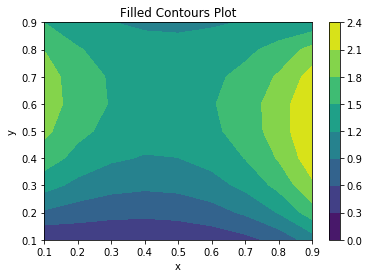

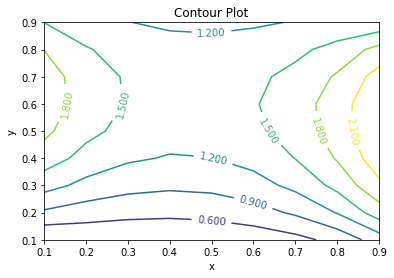

In [5]:
x4 = np.arange(0,1.01,0.1)
y4 = np.arange(0,1.01,0.1)
h4 = 0.1
u4 = np.zeros(81)
# form a 81x81 banded matrix
aa4 = np.zeros(81)
aa4[0:] = -4.
bb4 = np.zeros(80)
bb4[0:] = 1.
cc4 = np.zeros(72)
cc4[0:] = 1.
data4 = [aa4.tolist(),bb4.tolist(),cc4.tolist(),bb4.tolist(),cc4.tolist()]
position4 = [0, 1, 9, -1, -9]
A4 = diags(data4,position4,(81,81),'csr')
b4 = np.zeros(81)
for j in range(9):
    for i in range(9):
        b4[9*j + i] = h4**2*(x4[i+1] + y4[j+1])
        if i == 0:
            b4[9*j + i] -= 0.
        if i == 8:
            b4[9*j + i] -= 1.
        if j == 0:
            b4[9*j + i] -= 0.
        if j == 8:
            b4[9*j + i] -= 1.
u4[0:] = spsolve(A4,b4)
X4, Y4 = np.meshgrid(x4[1:-1],y4[1:-1])
Z4 = np.reshape(u4,(9,9))
plt.figure(4)
cp = plt.contourf(X4, Y4, Z4)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.figure(5)
cp2 = plt.contour(X4, Y4, Z4)
plt.clabel(cp2, inline=True, 
          fontsize=10)
plt.title('Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 5
An aquifer is located between two rivers, and fluctuations in the water table are monitored at two wells located 1100 meters apart. During a flood, the rise in the water table as measured at both wells was found to be
$$r(t) = \begin{cases} 
      \frac{5}{3}t, & t\leq 3 \\
      5e^{-(t - 3)/5}, & t\gt 3 
   \end{cases}
$$
where r is measured in meters, and t is measured in days. The change in the water table, h(x,t), as a result of the flood is modeled by the following partial differential equation.
$$\frac{\partial h}{\partial t} = \alpha \frac{\partial^2 h}{\partial x^2},\quad h(x,0) = 0,\;h(0,t) = h(1100,t) = r(t)$$
The hydraulic diffusivity of the soil has been experimentally determined to be
$$\alpha = 0.0059\frac{m^2}{s} = 509.76\frac{m^2}{day}$$

(a) Determine $h(x,t)$ at the peak of the flood, $t = 3$.

(b) Plot $h(x,t)$ for $t = 10$, $t = 15$ and $t = 20$.

$\textbf{Solution:}$ To maintain the stability of FTCS scheme, we have
$$\Delta t \leq \frac{\Delta x^2}{2\alpha}$$
Choose $\Delta x = 11$ and $\Delta t = 0.1$, the discretized equation is formulated as
$$h_i^{k+1} = h_i^k + \frac{\alpha \Delta t}{\Delta x^2}(h_{i+1}^k - 2h_i^k + h_{i-1}^k)$$
(a) The code to generate results for $t = 3$ is given below,

The final result at t = 3 is  [  5.00000000e+00   3.59641939e+00   2.52673220e+00   1.73152493e+00
   1.15574197e+00   7.50283088e-01   4.73015373e-01   2.89164242e-01
   1.71135648e-01   9.78897835e-02   5.40216711e-02   2.87087133e-02
   1.46619368e-02   7.18024345e-03   3.36354244e-03   1.50309013e-03
   6.38809728e-04   2.57300386e-04   9.78209322e-05   3.49374540e-05
   1.16559734e-05   3.60772713e-06   1.02705268e-06   2.66038226e-07
   6.17835823e-08   1.26178939e-08   2.19733227e-09   3.12449761e-10
   3.28706700e-11   2.16112496e-12   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0

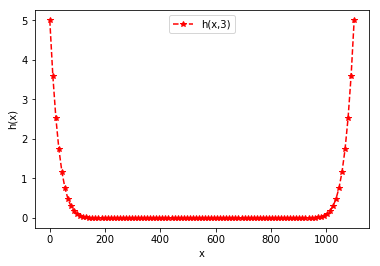

In [6]:
alpha = 509.76
Nx = 100
Nt = 30
x5 = np.linspace(0., 1100., Nx+1)    # mesh points in space
dx5 = x5[1] - x5[0]
t5 = np.linspace(0, 3., Nt+1)    # mesh points in time
dt5 = t5[1] - t5[0]
F = alpha*dt5/dx5**2
u5 = np.zeros(Nx+1)           # unknown u at new time level
u_1 = np.zeros(Nx+1)           # u at the previous time level

# Set initial condition u(x,0) = I(x)
u_1[0:] = 0

for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u5[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])

    # Insert boundary conditions
    u5[0] = 5./3.*(n+1)*dt5;  u5[Nx] = 5./3.*(n+1)*dt5

    # Update u_1 before next step
    u_1[:]= u5
print('The final result at t = 3 is ', u5)
plt.figure(6)
plt.plot(x5,u5,'r*--',label='h(x,3)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.show()

(b) The code to generate results for $t = 10$, $t = 15$ and $t = 20$ are shown below,

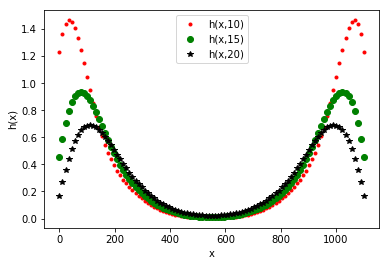

In [8]:
for n in range(0,170):
    for i in range(1,Nx):
        u5[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])
    u5[0] = 5.*np.exp(-(n+1)*dt5/5.);  u5[Nx] = 5.*np.exp(-(n+1)*dt5/5.)
    u_1[:]= u5
    if n == 69:
        u510 = np.copy(u5)
    if n == 119:
        u515 = np.copy(u5)
    if n == 169:
        u520 = np.copy(u5)
plt.figure(7)
plt.plot(x5,u510,'r.',label='h(x,10)')
plt.plot(x5,u515,'go',label='h(x,15)')
plt.plot(x5,u520,'k*',label='h(x,20)')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend()
plt.show()